---
# **Diabetes Disease Prediction**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/diabetes.csv'))
dataset = pd.DataFrame(pd.read_csv('../datasets/diabetes.csv'))
dataset.head()
# dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


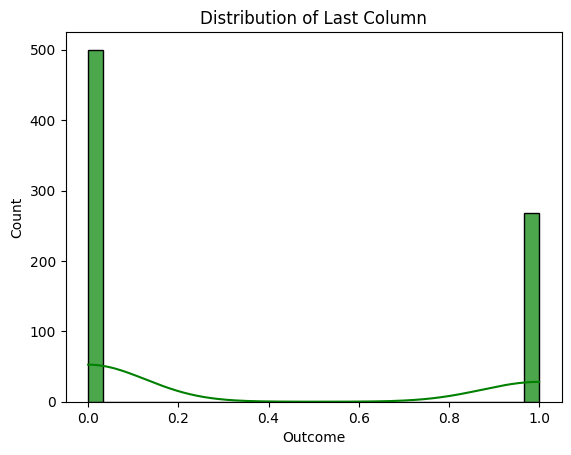

In [3]:
# Plot target distribution

# plt.figure(figsize=(10, 6))
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Last Column')
plt.show()

In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

❌ No Categorical Columns Found...
✅ Numerical Columns found: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (768, 9) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

> Statistical summary of the Dataset:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
count       76

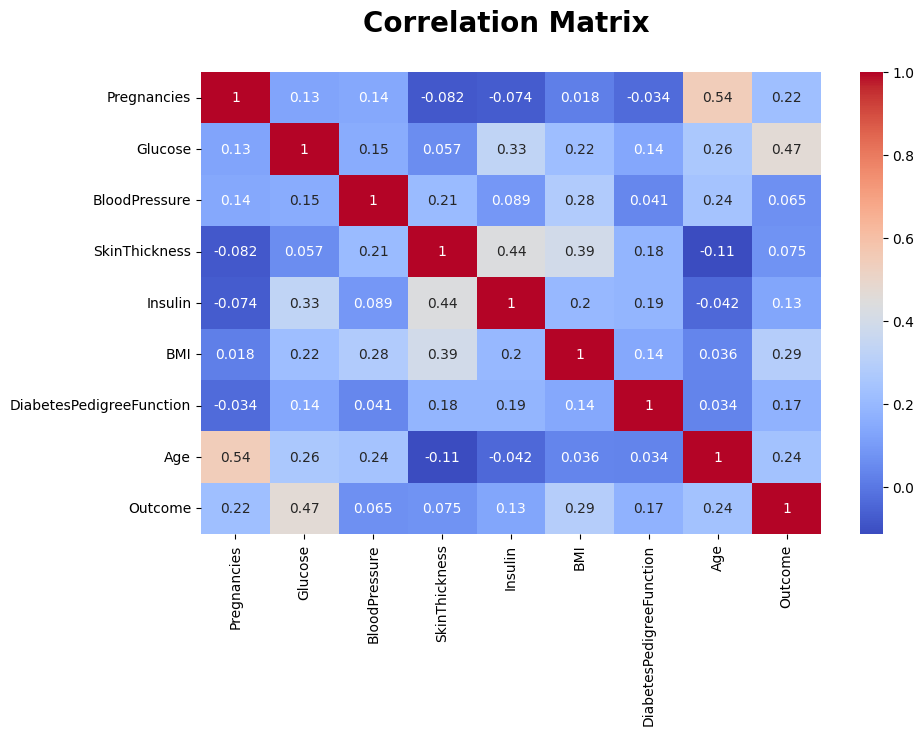

In [6]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        dataset[categorical_cols] = categorical_imputer.fit_transform(dataset[categorical_cols])

      # Exclude the dependent variable column (last column) if it's numerical
      if len(numerical_cols) > 0:
          dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

### Step-3.4: Checking for Stopwords and Stemming them:-

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

if categorical_cols.any():

  nltk.download('stopwords')

  stop_words = set(stopwords.words('english'))
  stop_words.discard('not')
  # print("\n Stop Words are: ", stop_words, "\n")
  def stemming(text):
      words = text.lower().split()

      stemmer = PorterStemmer()
      stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
      return ' '.join(stemmed_words)  # Join stemmed words back into a string

  # Apply the stemming function to the specified columns
  for column in categorical_cols:
      dataset[column] = dataset[column].astype(str).apply(stemming)

  print("✅ Stemming Completed Successfully... \n")
  # print(dataset.head().to_string(header=True))
else:
  print("❌ No Stemming Needed...")

❌ No Stemming Needed...


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [11]:
# Check for binary and multi-value categorical columns#+

cols_for_encoding = []

for col in dataset.columns:
    unique_values = dataset[col].unique()
    if 2 <= len(unique_values) < 18:
        cols_for_encoding.append(col)
        print(f"> '{col}' column with unique values: \t{unique_values}")

print("\n")
print(f" '{len(cols_for_encoding)}' Columns Found: \n\t {cols_for_encoding}")


> 'Pregnancies' column with unique values: 	[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
> 'Outcome' column with unique values: 	[1 0]


 '2' Columns Found: 
	 ['Pregnancies', 'Outcome']


In [12]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
# LabelEncode binary columns
for col in cols_for_encoding:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    encoders[col] = le  # Store encoder for later use
    print(f"✅ '{col}' has been encoded Successfully...\n")

X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True), "\n")
print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=True))


✅ 'Pregnancies' has been encoded Successfully...

✅ 'Outcome' has been encoded Successfully...

Matrix of Features(X): 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148             72             35        0 33.60                      0.63   50
1            1       85             66             29        0 26.60                      0.35   31
2            8      183             64              0        0 23.30                      0.67   32
3            1       89             66             23       94 28.10                      0.17   21
4            0      137             40             35      168 43.10                      2.29   33 

Dependent Variable(y): 
    Outcome
0        1
1        0
2        1
3        0
4        1


## Step-4: Split the Dataset into the Training set and Test set:-

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [ ]:
# import joblib
# from sklearn.preprocessing import StandardScaler

# # Scaling Features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# joblib.dump(scaler, '../saved_models/diabetes_scaler.pkl')
# print("✅ scaler have been saved Successfully...\n")

# print("✅ Feature Scaling is Done Successfully...\n")
# # print("Printing Training Sets after Feature Scaling:")
# # print("> X_train: \n", X_train)
# # print("\n")
# # print("Printing Test Sets after Feature Scaling:")
# # print("> X_test: \n", X_test)

✅ scaler have been saved Successfully...

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

models = {
  DecisionTreeClassifier(max_depth=5)
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"  Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
  print(f"  Precision: \t {precision_score(y_test, y_pred):.2f}")
  print(f"  Recall: \t {recall_score(y_test, y_pred):.2f}")
  print(f"  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")

✅ DecisionTreeClassifier is trained Sucessfully...
-> DecisionTreeClassifier:-
  Accuracy: 	 0.80
  Precision: 	 0.76
  Recall: 	 0.64
  F1 Score: 	 0.69
  ROC-AUC Score: 0.76



# ***Step-C: Saving the Model...***

In [16]:
import joblib

joblib.dump(model, f'../saved_models/DIABETES_Disease_Prediction_Model.pkl')
print(f"✅ Model saved: DIABETES_Disease_Prediction_Model.pkl")

✅ Model saved: DIABETES_Disease_Prediction_Model.pkl
